# Load Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/content/drive/MyDrive/NEU/5500'

In [3]:
df_raw_data = pd.read_csv('2022-08-03-ss.cleaned.csv') # import review data

# EDA

In [54]:
df_raw_data.sample(8)

,pdb_id,chain_code,seq,sst8,sst3,len_x,has_nonstd_aa
258049,4RM5,B,GEIRPTIGQQMETGDQRFGDLVFRQLAPNVWQHTSYLDMPGFGAVA...,CCCCCCCCCCCCCCCEEETTEEEEEEETTEEEEEEECCCCCCCCCE...,CCCCCCCCCCCCCCCEEECCEEEEEEECCEEEEEEECCCCCCCCCE...,242,False
415022,4UF7,A,ETGAHGPSPCRNFSSVPTIYYYRIPGLYNRTALDERCILNPRLTIS...,CCCCCCCCCCCCCTTCCCCEEEEECCSCCCTTCTTEEEEEEEEEEE...,CCCCCCCCCCCCCCCCCCCEEEEECCCCCCCCCCCEEEEEEEEEEE...,454,False
16266,2MVL,A,TNRRKSGKYKKVEIKELGELRKEPSL,CCCGGGSTHHHHHHHHHHTTTSCSCC,CCCHHHCCHHHHHHHHHHCCCCCCCC,26,False
269717,4YJK,E,MADVFHLGLTKAMLDGATLAIVPGDPERVKRIAELMDNATFLASHR...,CCCSTTTCCCGGGGTTCCEEEECSCGGGHHHHHTTSEEEEEEEEET...,CCCCCCCCCCHHHHCCCCEEEECCCHHHHHHHHCCCEEEEEEEEEC...,252,False
139149,3IN6,A,GMLESVRKEWLEIMDRELLEKARSLINANYISTTLSTVDRNYEVNI...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHTCSSEEEEEECTTCCEEE...,CHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCEEEEEECCCCCEEE...,148,False
375271,2VOE,B,MRVGIPTETKNNEFRVAITPAGVAELTRRGHEVLIQAGAGEGSAIT...,CEEEECCCCSTTCCCCSCCHHHHHHHHHTTCEEEEETTTTGGGTCC...,CEEEECCCCCCCCCCCCCCHHHHHHHHHCCCEEEEECCCCHHHCCC...,371,False
62374,4RNG,C,MEFSIDLNNLIGIIAGAITTSALIPQALKIYKTKSARDVSLAMFIF...,CCCCCCHHHHHHHHHHHHHHHTHHHHHHHHHHHTCCTTSCHHHHHH...,CCCCCCHHHHHHHHHHHHHHHCHHHHHHHHHHHCCCCCCCHHHHHH...,94,False
187676,3QPI,A,MTFTVFTGGDSGAWSILSVAPVIGESLMAASHLAIAPSLSLGDTSA...,CCCEEEEEESCSSEEEEEEEEEESCCCCCCSEEEEEECCCCCCCCC...,CCCEEEEEECCCCEEEEEEEEEECCCCCCCCEEEEEECCCCCCCCC...,189,False


In [5]:
# get some basic sense of the sequence and chain code data

uniq_seq = df_raw_data['seq'].nunique()
uniq_cc  = df_raw_data['chain_code'].nunique()


cc_per_seq = df_raw_data.groupby('seq').agg({'chain_code':'nunique'}).reset_index()['chain_code'].mean()

print('There are %s unique sequences and %s unique chain codes'  % (uniq_seq,uniq_cc))
print('Each sequence has an average of %s chain codes'  % round(cc_per_seq,2))

There are 112700 unique sequences and 62 unique chain codes
Each sequence has an average of 2.33 chain codes


## Seq length

In [6]:
min_len  = df_raw_data['len_x'].min()
max_len  = df_raw_data['len_x'].max()
mean_len = df_raw_data['len_x'].mean()
mode_len  = df_raw_data['len_x'].mode()

print('The smallest sequence length is : %s' % min_len)
print('The maximum sequence length is : %s' % max_len)
print('The average sequence length is : %s' % round(mean_len,2))
print('The most common sequence length is : %s' % mode_len)

The smallest sequence length is : 3
The maximum sequence length is : 5037
The average sequence length is : 268.78
The most common sequence length is : 0    231
dtype: int64


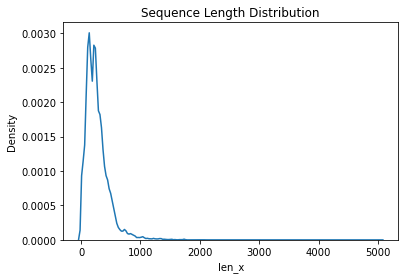

In [7]:
plt.figure()
sns.distplot(df_raw_data['len_x'],hist = False)
plt.title('Sequence Length Distribution')
plt.show()  

##### Standard vs non standard amino acid breakout

In [8]:
df_raw_data.groupby('has_nonstd_aa').agg({'seq':'nunique'}).reset_index()

,has_nonstd_aa,seq
0,False,109786
1,True,2914


In [9]:
# non aa sequences make up only ~2% of total sequence data

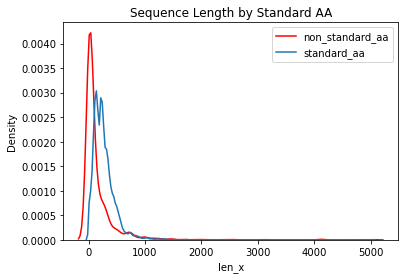

In [10]:
# checking the distribution of sequence length by aa breakout
non_stand_true  =  df_raw_data[df_raw_data['has_nonstd_aa'] == True]
non_stand_false =  df_raw_data[df_raw_data['has_nonstd_aa'] == False]
                               
plt.figure()

sns.distplot(non_stand_true['len_x'], hist = False, color = 'red', label = 'non_standard_aa')
sns.distplot(non_stand_false['len_x'], hist = False, label = 'standard_aa')

plt.title('Sequence Length by Standard AA')
plt.legend()
plt.show()                         

## AA sequence and structure profile

In [47]:
# get the count of each AA within the entire sequence list

from collections import Counter

def chart_dist(df,param, col_name):
    cnt = Counter()
    seq_list = df[param].unique().tolist()


    for seq in seq_list:
          for aa in set(seq):
              cnt[aa]+=1
        
    df_count = pd.DataFrame(cnt.items(), columns=[col_name, 'count']).sort_values(by='count')
    
    sns.barplot(x=col_name,
                y='count',
                data=df_count, 
                color='steelblue')

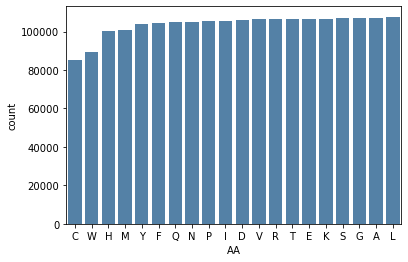

In [48]:
# chart the distribution of amino acids within all sequences
chart_dist(non_stand_false, 'seq', 'AA')

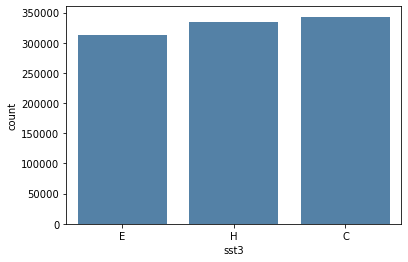

In [50]:
# chart the distribution of protein structure (sst3)
chart_dist(non_stand_false, 'sst3', 'sst3 distribution')

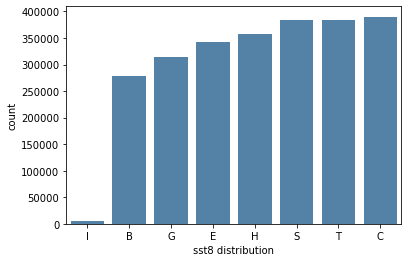

In [51]:
# chart the distribution of protein structure (sst3)
chart_dist(non_stand_false, 'sst8', 'sst8 distribution')